In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/Users/denismasterov/Documents/python/ml_zoomcamp/ml_zoomcamp/chapter-03-churn/data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(max_iter=2010)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2010)

In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

Accuracy and dummy model

In [8]:
len(y_val)

1409

In [9]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [10]:
1132/1409

0.8034066713981547

In [11]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [12]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)
# scores

0.00 0.274
0.05 0.513
0.10 0.608
0.15 0.661
0.20 0.703
0.25 0.735
0.30 0.758
0.35 0.767
0.40 0.782
0.45 0.791
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.789
0.70 0.766
0.75 0.743
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


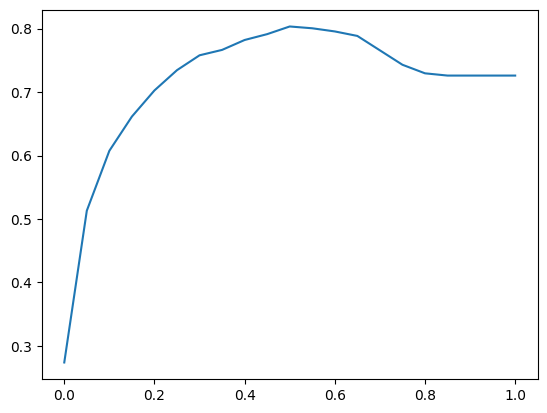

In [13]:
plt.plot(thresholds, scores)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.513
0.10 0.608
0.15 0.661
0.20 0.703
0.25 0.735
0.30 0.758
0.35 0.767
0.40 0.782
0.45 0.791
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.789
0.70 0.766
0.75 0.743
0.80 0.730
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [16]:
from collections import Counter
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

Confused table

In [17]:
acutal_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [18]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [19]:
# print(len(acutal_positive), len(predict_positive))
tp = (acutal_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & acutal_positive).sum()
print(fp, fn)

103 174


In [20]:
confusion_matrix = np.array(
    [[tn, fp], 
    [fn, tp]]
)
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

Precision and Recall

In [21]:
(tp + tn)/(tp+tn+fp+fn)

np.float64(0.8034066713981547)

In [22]:
p = tp / (tp + fp)
p

np.float64(0.6730158730158731)

In [23]:
r = tp / (tp + fn)
r # percent incorrectly identified false negative

np.float64(0.5492227979274611)

ROC curve

In [24]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5492227979274611)

In [25]:
fpr = fp / (tn + fp)
fpr

np.float64(0.10068426197458455)

In [27]:
scores = []

thresholds = np.linspace(0,1, 101)

for t in thresholds:
    acutal_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (acutal_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & acutal_positive).sum()

    scores.append((t, tp, fp, fn, tn))

scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(895), np.int64(1), np.int64(128)),
 (np.float64(0.02), np.int64(383), np.int64(804), np.int64(3), np.int64(219)),
 (np.float64(0.03), np.int64(382), np.int64(749), np.int64(4), np.int64(274)),
 (np.float64(0.04), np.int64(382), np.int64(709), np.int64(4), np.int64(314)),
 (np.float64(0.05), np.int64(378), np.int64(678), np.int64(8), np.int64(345)),
 (np.float64(0.06), np.int64(377), np.int64(653), np.int64(9), np.int64(370)),
 (np.float64(0.07), np.int64(374), np.int64(623), np.int64(12), np.int64(400)),
 (np.float64(0.08), np.int64(371), np.int64(588), np.int64(15), np.int64(435)),
 (np.float64(0.09), np.int64(370), np.int64(557), np.int64(16), np.int64(466)),
 (np.float64(0.1), np.int64(366), np.int64(533), np.int64(20), np.int64(490)),
 (np.float64(0.11), np.int64(365), np.int64(511), np.int64(21), np.int64(512)),
 (np.float64(0.12), np.int64(361), np.int64(497), 

In [28]:
columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,thresholds,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,895,1,128
2,0.02,383,804,3,219
3,0.03,382,749,4,274
4,0.04,382,709,4,314
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [29]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)
df_scores

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,895,1,128,0.997409,0.874878
2,0.02,383,804,3,219,0.992228,0.785924
3,0.03,382,749,4,274,0.989637,0.732160
4,0.04,382,709,4,314,0.989637,0.693060
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


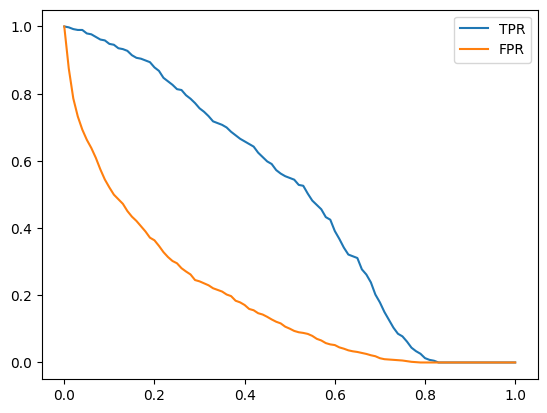

In [30]:
plt.plot(df_scores.thresholds, df_scores.tpr, label = 'TPR')

plt.plot(df_scores.thresholds, df_scores.fpr, label = 'FPR')

plt.legend()

Random model

In [31]:
np.random.seed(1)

y_rand = np.random.uniform(0,1, size=len(y_val))

((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [32]:
def tpr_fpr_dataframe(y_val, y_pred):

    scores = []

    thresholds = np.linspace(0,1, 101)

    for t in thresholds:
        acutal_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (acutal_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & acutal_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.tn + df_scores.fp)

    return df_scores

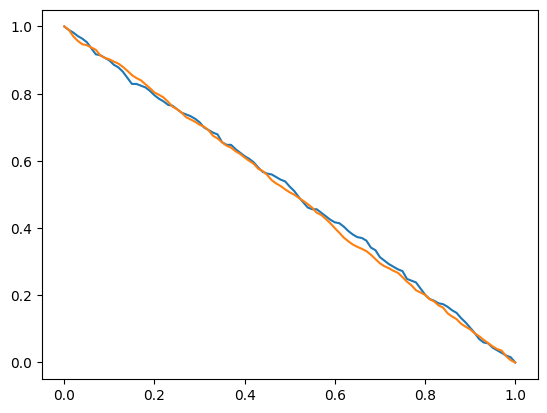

In [33]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

plt.plot(df_rand.thresholds, df_rand.tpr, label = 'TPR')

plt.plot(df_rand.thresholds, df_rand.fpr, label = 'FPR')

Ideal model

In [34]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [35]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [36]:
y_ideal_pred = np.linspace(0,1, len(y_ideal))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [37]:
((y_ideal_pred > 0.726) == y_ideal).mean()


np.float64(1.0)

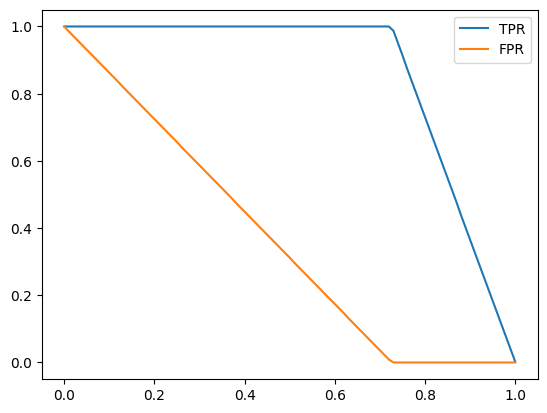

In [38]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

plt.plot(df_ideal.thresholds, df_ideal.tpr, label = 'TPR')

plt.plot(df_ideal.thresholds, df_ideal.fpr, label = 'FPR')

plt.legend()

Plot together

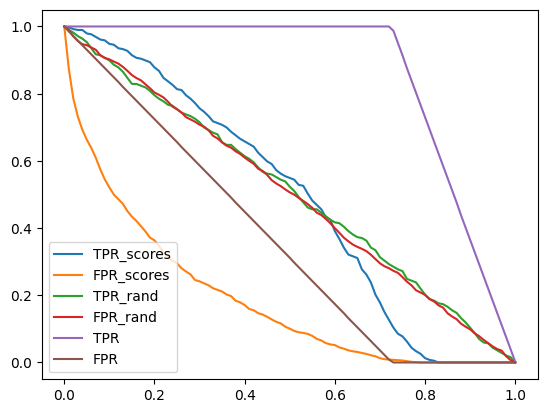

In [39]:
plt.plot(df_scores.thresholds, df_scores.tpr, label = 'TPR_scores')

plt.plot(df_scores.thresholds, df_scores.fpr, label = 'FPR_scores')

plt.plot(df_rand.thresholds, df_rand.tpr, label = 'TPR_rand')

plt.plot(df_rand.thresholds, df_rand.fpr, label = 'FPR_rand')

plt.plot(df_ideal.thresholds, df_ideal.tpr, label = 'TPR')

plt.plot(df_ideal.thresholds, df_ideal.fpr, label = 'FPR')

plt.legend()

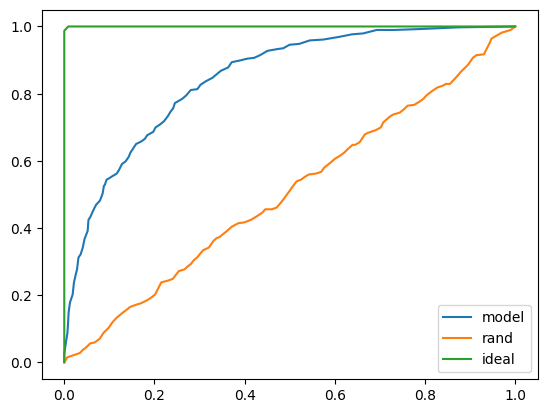

In [40]:
plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')

plt.plot(df_rand.fpr, df_rand.tpr, label = 'rand')

plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.legend()

In [41]:
from sklearn.metrics import roc_curve

In [42]:
fpr, tpr, thr = roc_curve(y_val, y_pred)

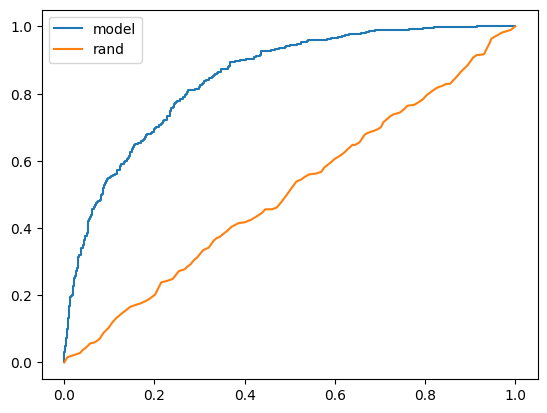

In [43]:
plt.plot(fpr, tpr, label = 'model')

plt.plot(df_rand.fpr, df_rand.tpr, label = 'rand')

plt.legend()


ROC AUC

In [44]:
from sklearn.metrics import auc

In [45]:
auc(fpr, tpr)

np.float64(0.8462993633476669)

In [46]:
auc(df_scores.fpr, df_scores.tpr)

np.float64(0.8459460896783311)

In [47]:
auc(df_ideal.fpr, df_ideal.tpr)

np.float64(0.9999430203759136)

In [48]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [49]:
import random

In [50]:
n = 10000
success = 0

for i in range(n):

    pos_idx = random.randint(0, len(pos) - 1)
    neg_idx = random.randint(0, len(neg) - 1)

    if pos[pos_idx] > neg[neg_idx]:
        success = success + 1

success/n

0.8496

In [52]:
n = 500000

np.random.seed(1)

pos_idx = np.random.randint(0, len(pos), size = n)
neg_idx = np.random.randint(0, len(neg), size = n)

(pos[pos_idx] > neg[neg_idx]).mean()

np.float64(0.846106)

Cross-validation

In [53]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[numerical + categorical].to_dict(orient = 'records')
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=2010)

    model.fit(X_train, y_train)

    return dv, model


In [54]:
def predict(df, dv, model):
    dicts = df[numerical + categorical].to_dict(orient='records')

    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [55]:
dv, model = train(df_train, y_train)

In [56]:
y_pred = predict(df_val, dv, model)

In [57]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [58]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [59]:
len(train_idx), len(val_idx), len(df_full_train)

(5070, 564, 5634)

In [60]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [118]:
!pip install tqdm

     |████████████████████████████████| 78 kB 882 kB/s eta 0:00:01
You should consider upgrading via the '/Users/denismasterov/Documents/python/ml_zoomcamp/ml_zoomcamp/.venv/bin/python3 -m pip install --upgrade pip' command.


In [61]:
from tqdm.auto import tqdm

In [62]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score

n_split = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):

    kfold = KFold(n_splits=n_split, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        score = roc_auc_score(y_val, y_pred)
        scores.append(score)
    
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.008
C=0.1 0.842 +- 0.007
C=0.5 0.842 +- 0.007
C=1 0.842 +- 0.007
C=5 0.842 +- 0.007
C=10 0.842 +- 0.007


In [63]:
np.mean(scores), np.std(scores)

(np.float64(0.8418136727901674), np.float64(0.006806430861250329))

In [64]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.8583761253209398)

In [67]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

np.float64(0.8583761253209398)